WeatherPy

In [111]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [112]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [128]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

lats = []
longs = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

num_samples = 5

for x in range(num_samples):
    lat = random.uniform(-90,90)
    lats.append(lat)
    long = random.uniform(-180,180)
    longs.append(long)
    city = citipy.nearest_city(lat, long)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    cities.append(f'{f_city}, {f_country}')
    
    q_url = f'{url}lat={lat}&lon={long}&units={units}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    temp = response["main"]["temp"]
    humid = response["main"]["humidity"]
    cloud = response["clouds"]["all"]
    wind = response["wind"]["speed"]
    
    temperature.append(temp)
    humidity.append(humid)
    cloudiness.append(cloud)
    wind_speed.append(wind)
    
df = pd.DataFrame({
    "Latitude": lats,
    "Longitude": longs,
    "City": cities,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})
df.head(20)

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed
0,80.501639,79.966807,"Dikson, RU",4.05,93,100,14.76
1,-27.778065,43.466587,"Beloha, MG",74.68,80,89,23.11
2,8.595653,-110.252555,"San Patricio, MX",83.75,78,58,11.79
3,33.121446,-42.336502,"Ribeira Grande, PT",64.38,82,94,22.15
4,-65.747649,108.343931,"Albany, AU",0.12,79,100,44.74


In [129]:
lats = df["Latitude"]
longs = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

(-30, 120)

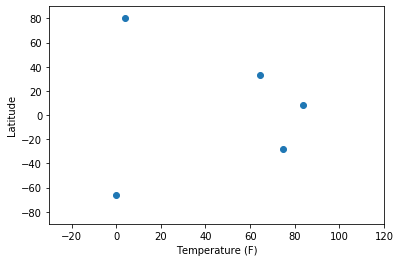

In [143]:
# Temp vs. Latitude
plt.scatter(temps, lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(-30, 120)

(0, 100)

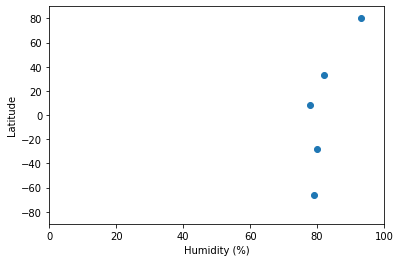

In [145]:
# Humidity vs. Latitude
plt.scatter(humids, lats)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 100)

(0, 110)

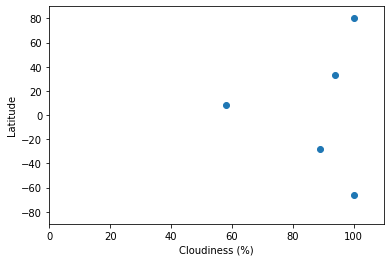

In [147]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 110)

(0, 60)

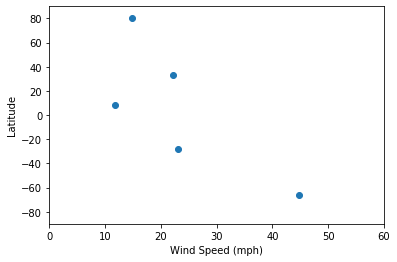

In [152]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 60)